In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np

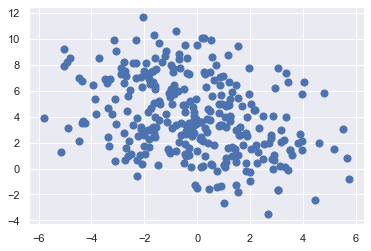

In [29]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=1.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50)

In [30]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

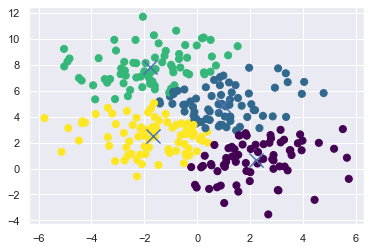

In [31]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], s=200, marker='x')

MovieWriter ffmpeg unavailable; using Pillow instead.


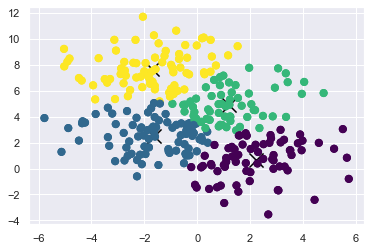

In [33]:
from sklearn.metrics import pairwise_distances_argmin
from celluloid import Camera

camera = Camera(plt.figure())

def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[:n_clusters] # [i] # 
    
    while True:
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)

        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])
        
        plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
        plt.scatter(new_centers[:, 0], new_centers[:, 1],  c='black', s=200, marker='x')
        camera.snap()

        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels

centers, labels = find_clusters(X, 4)
anim = camera.animate(blit=True)
anim.save('scatter.gif')

plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis')


Image downsampling 

(273280, 3)

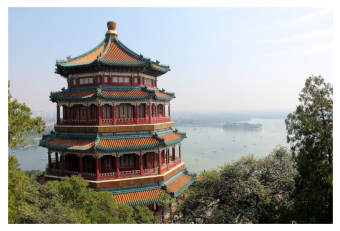

In [34]:
from sklearn.datasets import load_sample_image
img = load_sample_image("china.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(img);

data = img / 255.0 # use 0...1 scale
data = data.reshape(427 * 640, 3)
data.shape

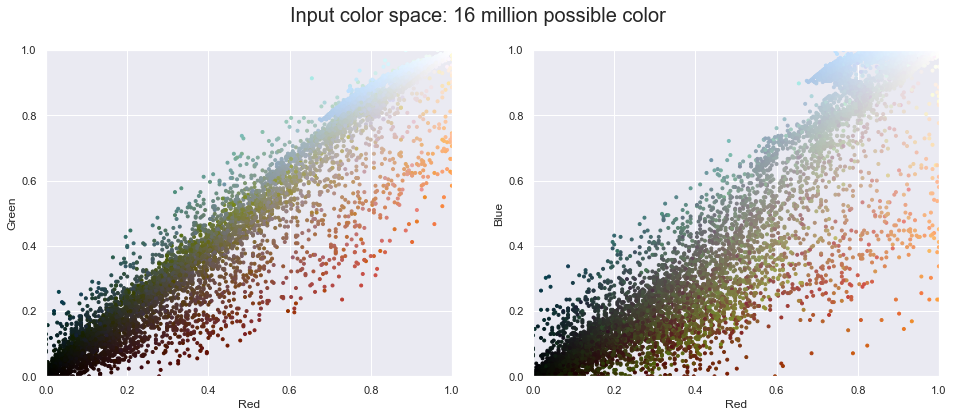

In [35]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data
    
    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T
    
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20)

plot_pixels(data, title='Input color space: 16 million possible color')

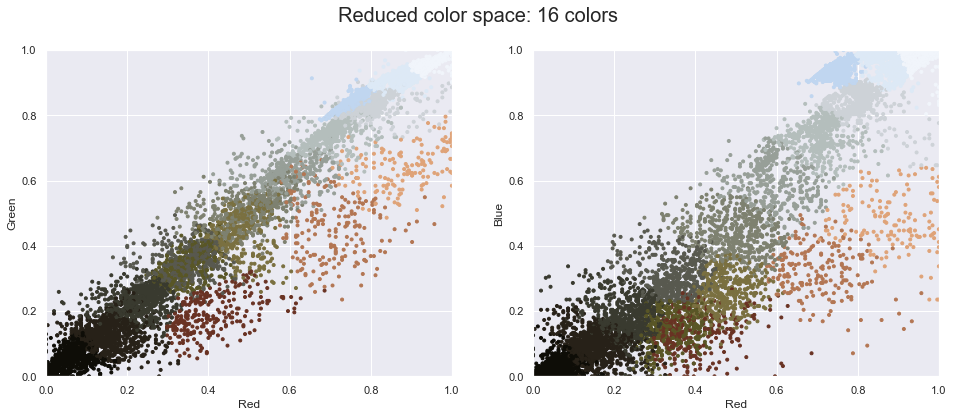

In [36]:
bit = 16
kmeans = KMeans(bit) 
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors,
            title=f"Reduced color space: {bit} colors")

Text(0.5, 1.0, '16-color Image')

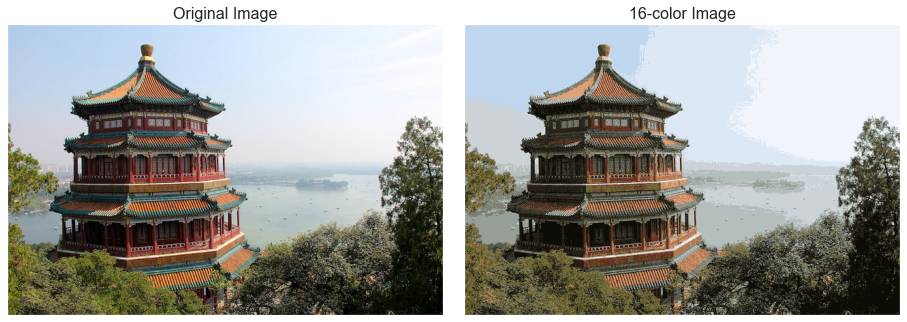

In [37]:
img_recolored = new_colors.reshape(img.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(img)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(img_recolored)
ax[1].set_title(f'{bit}-color Image', size=16)